## Step 0: Load Packages and Libraries


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Step 1: Data Loading and Preprocessing


In [80]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv('Data/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [81]:
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [82]:
train_data.shape

(5000, 32)

## Basic Operations


In [83]:
train_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [84]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [85]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [86]:
# Select relevant numeric columns (including those with missing values)
numeric_cols = ['Product Rating', 'Product Reviews Count']

In [87]:
# Normalize the numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[numeric_cols])


In [88]:
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [89]:
# Perform KNN imputation on all selected columns
imputed_data = imputer.fit_transform(scaled_data)


In [90]:
# Replace the original columns with the imputed values
train_data[numeric_cols] = scaler.inverse_transform(imputed_data)


In [91]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating              0
Product Reviews Count       0
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [99]:
# Fill nulls in Product Brand based on Product Category
train_data['Product Brand'] = train_data.groupby('Product Category')['Product Brand'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

# Fill nulls in Product Category based on Product Brand
train_data['Product Category'] = train_data.groupby('Product Brand')['Product Category'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

# Fill nulls in Product Description with the most common description in the same Product Category
train_data['Product Description'] = train_data.groupby('Product Category')['Product Description'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'No description available')
)



In [100]:
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,4.294622,571.035565,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,No description available,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,4.294622,571.035565,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.500000,29221.000000,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [101]:
train_data.isnull().sum()

Uniq Id                   0
Product Id                0
Product Rating            0
Product Reviews Count     0
Product Category         10
Product Brand            10
Product Name              0
Product Image Url         0
Product Description      10
Product Tags              0
dtype: int64

In [102]:
# Drop rows with any null values in key columns
train_data = train_data.dropna(subset=['Product Category', 'Product Brand', 'Product Description'])


In [34]:
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,4.294622,571.035565,936,1039,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,4.294622,571.035565,131,998,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.500000,29221.000000,137,299,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [103]:
train_data.isnull().sum()


Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [104]:
train_data.duplicated().sum()

np.int64(0)

In [105]:
train_data.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags'],
      dtype='object')

In [106]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/3990933810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns=column_name_mapping, inplace=True)


In [107]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,4.294622,571.035565,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,No description available,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,4.294622,571.035565,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.500000,29221.000000,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,4.294622,571.035565,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,4.460000,131.000000,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [108]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/241338002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/241338002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)


In [109]:
train_data.head()


,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,4.294622,571.035565,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,No description available,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,4.294622,571.035565,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.500000,29221.000000,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,4.294622,571.035565,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,4.460000,131.000000,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [110]:
# Format 'Rating' to one decimal point
train_data['Rating'] = train_data['Rating'].round(1)

# Round 'ReviewCount' to the nearest whole number and ensure it has a .0 at the end
train_data['ReviewCount'] = train_data['ReviewCount'].round(0)

# Ensure 'ReviewCount' is displayed as float with one decimal point
train_data['ReviewCount'] = train_data['ReviewCount'].astype(float)

# Display the formatted DataFrame
print(train_data[['Rating', 'ReviewCount']].head())


   Rating  ReviewCount
0     4.3        571.0
1     4.3        571.0
2     4.5      29221.0
3     4.3        571.0
4     4.5        131.0


/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1315726876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Rating'] = train_data['Rating'].round(1)
/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1315726876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ReviewCount'] = train_data['ReviewCount'].round(0)
/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1315726876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [111]:
train_data.head()


,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,4.3,571.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,No description available,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,4.3,571.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,4.3,571.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,4.5,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


## Step 2: EDA (Exploratory Data Analysis)


In [112]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1720
Number of unique items: 1696
Number of unique ratings: 35


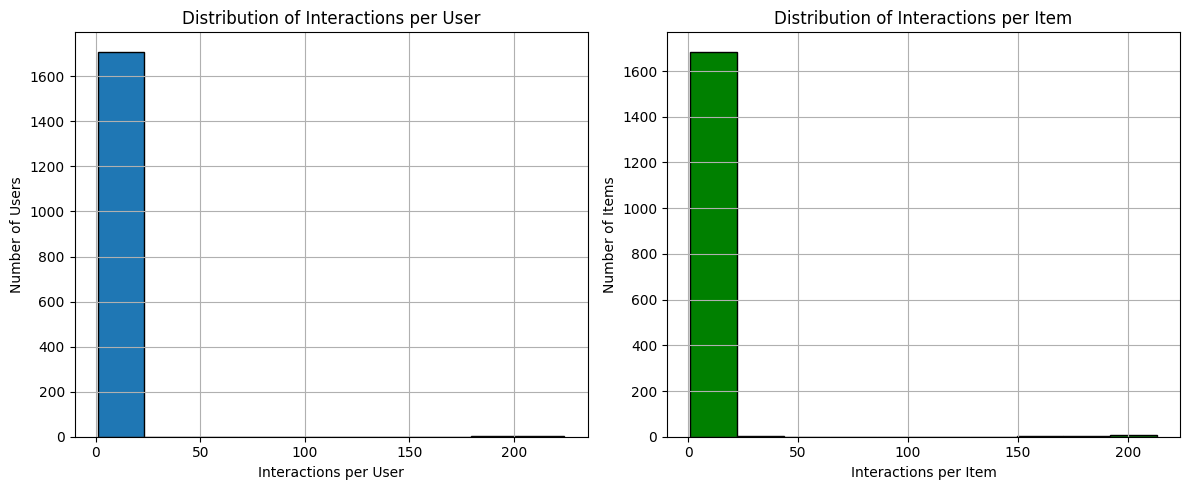

In [113]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

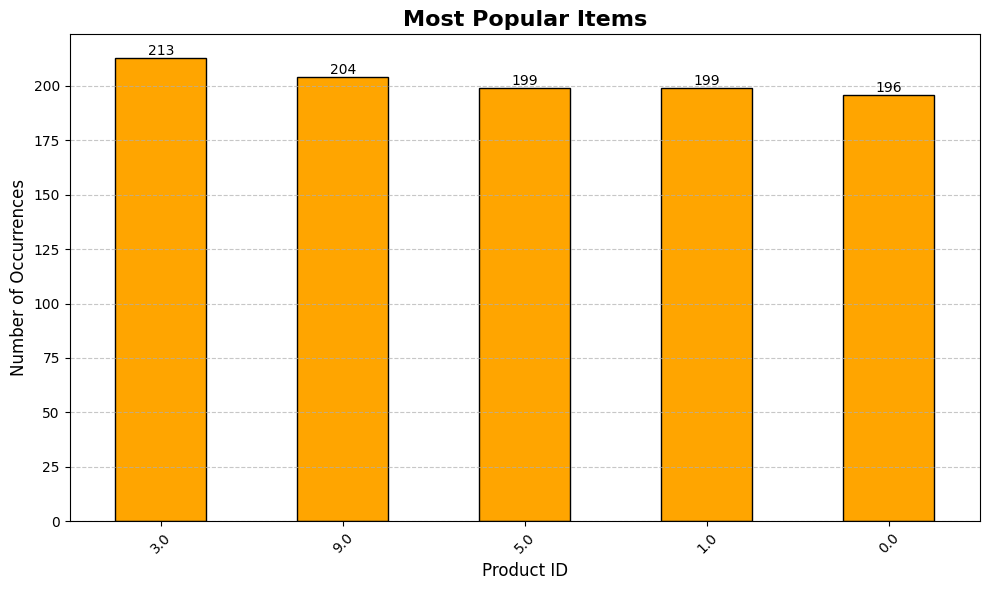

In [114]:
# Most popular items
popular_items = train_data['ProdID'].value_counts().head(5)

# Create a plot
plt.figure(figsize=(10, 6))  # Set figure size
ax = popular_items.plot(kind='bar', color='orange', edgecolor='black')

# Add a title and labels
plt.title("Most Popular Items", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)

# Add data labels on top of the bars
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.0f}",  # Show exact count
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Improve x-axis readability if labels are long
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


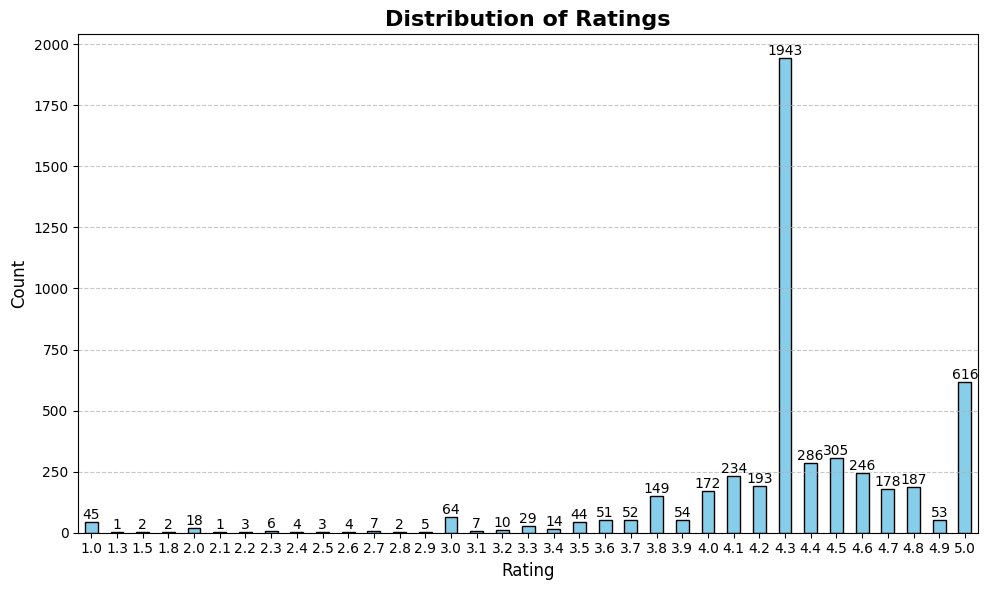

In [115]:
# Most rated counts
most_rated = train_data['Rating'].value_counts().sort_index()  # Sort by Rating

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
ax = most_rated.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and axis labels
plt.title("Distribution of Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add data labels on top of each bar
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.0f}",  # Show exact count
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Improve x-axis readability
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Step 3: Data Cleaning and Tags Creations


In [116]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [117]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [118]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,4.3,571.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"description, available","premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,4.3,571.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,4.3,571.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,4.5,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


## Rating Base Recommendations System

### When you come to a website for the first time they usually don't have any data about you to give recommendations. So websites generally show the top rated products



In [119]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [120]:
top_rated_products = average_ratings.sort_values(by=['Rating'], ascending=False)


In [121]:
rating_base_recommendation = top_rated_products.head(10)

In [122]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1388308431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1388308431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [123]:
rating_base_recommendation.head()

,Name,ReviewCount,Brand,ImageURL,Rating
1368,Covergirl Outlast UltiMatte One Step Liquid Li...,1,covergirl,https://i5.walmartimages.com/asr/2ed7a79f-8a35...,5
3897,"Revlon Almay Wake Up Hydrating Makeup, 0.35 oz",1,almay,https://i5.walmartimages.com/asr/37ccb92a-d452...,5
1229,Clean W-BB-1725 Clean Shower Fresh Moisture Ri...,1,clean,https://i5.walmartimages.com/asr/8d56e3fe-002a...,5
1240,Clinique All About Eyes De-Puffing Eye Massage...,2,clinique,https://i5.walmartimages.com/asr/5096dafc-79a5...,5
3932,"Revlon Perfectweeze Tweezer, Slant Tip, 1 ea (...",5,revlon,https://i5.walmartimages.com/asr/aee77d8c-4d25...,5


In [124]:
rating_base_recommendation.head()

,Name,ReviewCount,Brand,ImageURL,Rating
1368,Covergirl Outlast UltiMatte One Step Liquid Li...,1,covergirl,https://i5.walmartimages.com/asr/2ed7a79f-8a35...,5
3897,"Revlon Almay Wake Up Hydrating Makeup, 0.35 oz",1,almay,https://i5.walmartimages.com/asr/37ccb92a-d452...,5
1229,Clean W-BB-1725 Clean Shower Fresh Moisture Ri...,1,clean,https://i5.walmartimages.com/asr/8d56e3fe-002a...,5
1240,Clinique All About Eyes De-Puffing Eye Massage...,2,clinique,https://i5.walmartimages.com/asr/5096dafc-79a5...,5
3932,"Revlon Perfectweeze Tweezer, Slant Tip, 1 ea (...",5,revlon,https://i5.walmartimages.com/asr/aee77d8c-4d25...,5


## Content Base Recommendation system (User Preferences or Items similarities) - coming soon

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [126]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [127]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name']==item_name].index[0]

In [128]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))


In [129]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [130]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]


,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,571.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,571.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,571.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,571.0,opi


## Function To Recommend Products for Content Base


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details


In [132]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,571.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,4.3
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,571.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,4.3
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,571.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,4.3
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,4.1
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,5.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


### To address the issue of products with very few reviews and a high rating being recommended, we can incorporate a weighted scoring system. This system accounts for both the rating and the number of reviews. This approach helps to prioritize items with both high ratings and sufficient review counts, which typically indicates more reliable recommendations.



Steps to Fix the Issue:
Introduce a Weighted Rating: Use a formula such as the Bayesian average to calculate a more reliable rating. This ensures products with a small number of reviews don't dominate recommendations.

Weighted Rating Formula:

Weighted Rating
=
(
v
⋅
R
)
+
(
m
⋅
C
)
v
+
m
Weighted Rating=
v+m
(v⋅R)+(m⋅C)
​

𝑅
R: Average rating of the product.
𝑣
v: Number of reviews of the product.
𝑚
m: Minimum number of reviews required to be considered.
𝐶
C: Mean rating across all products.

In [157]:
def content_based_recommendations_with_threshold(train_data, item_name, top_n=10, min_reviews=50):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item tags
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on tags
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the indices of the top similar items
    top_similar_items = similar_items[1:top_n + 10]  # Select more items initially for filtering

    # Retrieve the corresponding items
    recommended_items_details = train_data.iloc[[x[0] for x in top_similar_items]].copy()

    # Compute the weighted rating for each item
    C = train_data['Rating'].mean()  # Mean rating across all products
    m = train_data['ReviewCount'].quantile(0.75)  # Minimum reviews to be considered (75th percentile)

    def weighted_rating(row):
        v = row['ReviewCount']
        R = row['Rating']
        return ((v * R) + (m * C)) / (v + m) if v > 0 else C

    # Add weighted rating to the recommended items
    recommended_items_details['WeightedRating'] = recommended_items_details.apply(weighted_rating, axis=1)

    # Apply review count threshold
    recommended_items_details = recommended_items_details[recommended_items_details['ReviewCount'] >= min_reviews]

    # Sort recommendations by WeightedRating
    recommended_items_details = recommended_items_details.sort_values(by='WeightedRating', ascending=False)

    recommended_items_details = recommended_items_details[['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]


    # Return the top N recommendations
    return recommended_items_details.head(top_n)


In [158]:
recommended_items = content_based_recommendations_with_threshold(
    train_data,
    item_name="OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11",
    top_n=5,
    min_reviews=50
)
recommended_items


,Name,ReviewCount,Brand,ImageURL,Rating
3821,"Sally Hansen Hard as Nails Nail Polish, Unbrea...",571.0,"sally, hansen",https://i5.walmartimages.com/asr/fecff58e-f4b3...,4.3
599,Sally Hansen Triple Shine Nail Color 340 Scale...,571.0,"sally, hansen",https://i5.walmartimages.com/asr/adab37ef-3ef7...,4.3
2672,"Sally Hansen Design 3D Nail Sticker, Floral - ...",571.0,"sally, hansen",https://i5.walmartimages.com/asr/8d20adcd-e314...,4.3
4838,"Sally Hansen Miracle Gel, Sea Gals",571.0,"sally, hansen",https://i5.walmartimages.com/asr/cc176bdd-c29f...,4.3
1710,Sally Hansen Hard As Nails Xtreme Wear Nail Co...,1624.0,"sally, hansen",https://i5.walmartimages.com/asr/9f8f16d1-f2f2...,4.2


## Collaborative Filtering (User Item Similarity)


In [149]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)


In [150]:
user_similarity = cosine_similarity(user_item_matrix)


In [151]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [152]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [153]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [154]:
recommended_items_details.head(10)


,Name,ReviewCount,Brand,ImageURL,Rating
31,Head & Shoulders Dandruff Conditioner Dry Scal...,571.0,"head, shoulders",https://i5.walmartimages.com/asr/a924d53f-007d...,4.3
37,Wahl Color Pro Plus Haircut Kit 79752T,388.0,wahl,https://i5.walmartimages.com/asr/244aef35-aea3...,4.7
40,"Pantene Pro-V Repairing Mask Treatment, Gold S...",176.0,pantene,https://i5.walmartimages.com/asr/fbd2ba15-5051...,4.1
56,Grisi Soap - Avena Oat 3.5 Oz,571.0,grisi,https://i5.walmartimages.com/asr/aecd4fd9-bfec...,4.3
58,"Humco Holding Group Glycerin, 16 Fl. Oz.",1.0,humco,https://i5.walmartimages.com/asr/52f2515b-09ca...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
128,"Navitas Organics, Organic, Goji Berries, 16 oz...",571.0,"navitas, organics",https://i5.walmartimages.com/asr/721ba73b-d4d5...,4.3
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,571.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,4.3
147,Olay Complete Daily Moisturizer for Sensitive ...,737.0,olay,https://i5.walmartimages.com/asr/f8946948-5c8a...,4.7


In [155]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)


In [156]:
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
31,Head & Shoulders Dandruff Conditioner Dry Scal...,571.0,"head, shoulders",https://i5.walmartimages.com/asr/a924d53f-007d...,4.3
37,Wahl Color Pro Plus Haircut Kit 79752T,388.0,wahl,https://i5.walmartimages.com/asr/244aef35-aea3...,4.7
40,"Pantene Pro-V Repairing Mask Treatment, Gold S...",176.0,pantene,https://i5.walmartimages.com/asr/fbd2ba15-5051...,4.1
56,Grisi Soap - Avena Oat 3.5 Oz,571.0,grisi,https://i5.walmartimages.com/asr/aecd4fd9-bfec...,4.3
58,"Humco Holding Group Glycerin, 16 Fl. Oz.",1.0,humco,https://i5.walmartimages.com/asr/52f2515b-09ca...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
128,"Navitas Organics, Organic, Goji Berries, 16 oz...",571.0,"navitas, organics",https://i5.walmartimages.com/asr/721ba73b-d4d5...,4.3
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,571.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,4.3
147,Olay Complete Daily Moisturizer for Sensitive ...,737.0,olay,https://i5.walmartimages.com/asr/f8946948-5c8a...,4.7


## Hybrid Recommendations


In [159]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations_with_threshold(train_data,item_name, top_n,min_reviews=50)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)

In [160]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
3821,"Sally Hansen Hard as Nails Nail Polish, Unbrea...",571.0,"sally, hansen",https://i5.walmartimages.com/asr/fecff58e-f4b3...,4.3
599,Sally Hansen Triple Shine Nail Color 340 Scale...,571.0,"sally, hansen",https://i5.walmartimages.com/asr/adab37ef-3ef7...,4.3
2672,"Sally Hansen Design 3D Nail Sticker, Floral - ...",571.0,"sally, hansen",https://i5.walmartimages.com/asr/8d20adcd-e314...,4.3
4838,"Sally Hansen Miracle Gel, Sea Gals",571.0,"sally, hansen",https://i5.walmartimages.com/asr/cc176bdd-c29f...,4.3
1710,Sally Hansen Hard As Nails Xtreme Wear Nail Co...,1624.0,"sally, hansen",https://i5.walmartimages.com/asr/9f8f16d1-f2f2...,4.2
2434,Sally Hansen -Miracle Gel -Prince Char-mint -0...,11188.0,"sally, hansen",https://i5.walmartimages.com/asr/941e288b-add3...,4.2
3297,"Sally Hansen Miracle Gel Nail Polish, Lets Get...",11194.0,"sally, hansen",https://i5.walmartimages.com/asr/a157062c-8bb4...,4.2
4462,"Sally Hansen Miracle Gel Nail Polish, Birthday...",11224.0,"sally, hansen",https://i5.walmartimages.com/asr/3cd65509-149c...,4.2
2942,"Sally Hansen Miracle Gel Nail Polish, Smarteas...",11266.0,"sally, hansen",https://i5.walmartimages.com/asr/dcac19a4-d67e...,4.2
775,"Sally Hansen Miracle Gel Nail Polish, Leaf Me ...",11272.0,"sally, hansen",https://i5.walmartimages.com/asr/13c7e57c-526b...,4.2


In [161]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",571.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,4.3
3406,"Kokie Professional Matte Lipstick, Firecracker...",571.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,4.3
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,571.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,4.3
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",571.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,4.3
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,571.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,4.3
1240,Maybelline Color Sensational Elixir Lip Lacque...,571.0,maybelline,https://i5.walmartimages.com/asr/b80007ae-f2d9...,4.3
3206,"Revlon Ultra HD Vinyl Lip Polish, Liquid Lipst...",2039.0,revlon,https://i5.walmartimages.com/asr/4d4c21d8-da3c...,4.3
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
